**Applied Data Science Lab
Experiment No. 04 – Performance Evaluation Metrics (Supervised Models)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)

In [2]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [60,65,70,72,75,80,85,88,90,95],
    "Result": [0,0,0,0,1,1,1,1,1,1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
df

,Study_Hours,Attendance,Result
0,1,60,0
1,2,65,0
2,3,70,0
3,4,72,0
4,5,75,1
5,6,80,1
6,7,85,1
7,8,88,1
8,9,90,1
9,10,95,1


In [3]:
X = df[['Study_Hours','Attendance']]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 2]])

In [6]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)           # Sensitivity
specificity = TN / (TN + FP)

false_positive_rate = FP / (FP + TN)   # α
false_negative_rate = FN / (TP + FN)   # β
power = recall                          # 1 − β
f1 = 2 * (precision * recall) / (precision + recall)

accuracy, precision, recall, specificity, f1

(np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0))

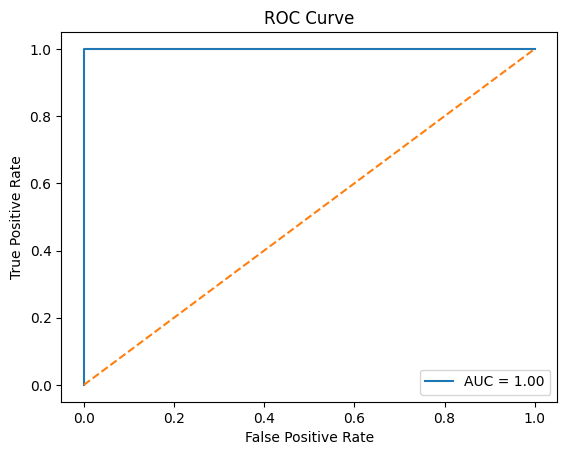

In [7]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [8]:
X = df[['Study_Hours','Attendance']]
y = [40,45,50,55,60,65,70,75,80,85]  # Marks

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2

(0.0, np.float64(0.0), 0.0, 1.0)